## 3. По трем значениям случайного вектора $(\xi, \eta, \omega)$: $(1, 0, 1)$, $(0, 1, 5)$ и $(1, 1, 2)$:

b) Найти уравнение ridge регрессии $\omega = a\xi + b\eta$, построить график CVSS и определить значение параметра регуляризации;

c) Найти уравнение lasso регрессии $\omega = a\xi + b\eta$, построить график CVSS и определить значение параметра регуляризации.


In [2]:
import pandas as pd
import statsmodels.api as sm

data = pd.DataFrame({
    'ξ': [1, 0, 1],
    'η': [0, 1, 1],
    'ω': [1, 5, 2]
})

### a) Найти уравнение линейной регрессии $\omega = a \xi + b \eta$;

In [3]:
PSI = data.drop('ω', axis=1)
Y = data.ω

model = sm.OLS(data.ω, PSI).fit()
print(model.params)

ξ   -0.333333
η    3.666667
dtype: float64


### b) Найти уравнение ridge регрессии $\omega = a\xi + b\eta$, построить график CVSS и определить значение параметра регуляризации;

In [4]:
import numpy as np
from sklearn.linear_model import Ridge

def alpha(i: int):
    return 10 * (i + 1) / N

N = 10000
CVSS = []
for i in range(N):
    CVSS.append(0)
    for j in range(3):
        ridge = Ridge(alpha=alpha(i), fit_intercept=False, max_iter=10000).fit(PSI.drop(j), Y.drop(j))
        CVSS[i] += (Y.loc[j] - np.dot(ridge.coef_, PSI.loc[j])) ** 2

alpha_opt = alpha(CVSS.index(min(CVSS)))
print(f'α_opt: {alpha_opt}')

ridge_opt = Ridge(alpha=alpha_opt, fit_intercept=False, max_iter=10000).fit(PSI, Y)
print(ridge_opt.coef_)

α_opt: 1.506
[0.31154701 1.9077162 ]


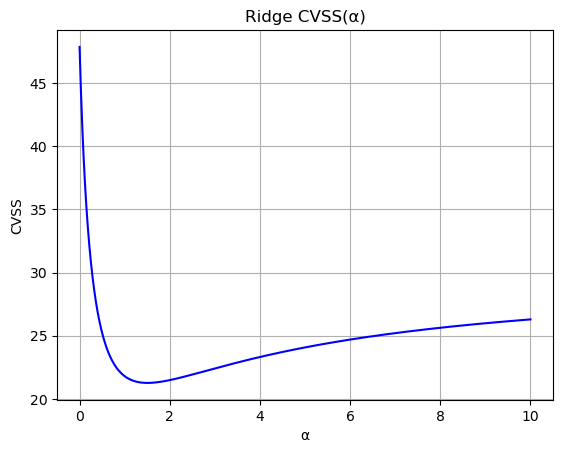

In [6]:
import matplotlib.pyplot as plt

plt.plot(np.linspace(0, 10, N), CVSS, color='b')

plt.xlabel('α')
plt.ylabel('CVSS')
plt.title('Ridge CVSS(α)')
plt.grid(True)
plt.show()

In [7]:
from sklearn.linear_model import Lasso

N = 10000
CVSS = []
for i in range(N):
    CVSS.append(0)
    for j in range(3):
        lasso = Lasso(alpha=alpha(i), fit_intercept=False, max_iter=10000).fit(PSI.drop(j), Y.drop(j))
        CVSS[i] += (Y.loc[j] - np.dot(lasso.coef_, PSI.loc[j])) ** 2

alpha_opt = alpha(CVSS.index(min(CVSS)))
print(f'α_opt: {alpha_opt}')

lasso_opt = Lasso(alpha=alpha_opt, fit_intercept=False, max_iter=10000).fit(PSI, Y)
print(lasso_opt.coef_)

α_opt: 1.5
[0.   1.25]


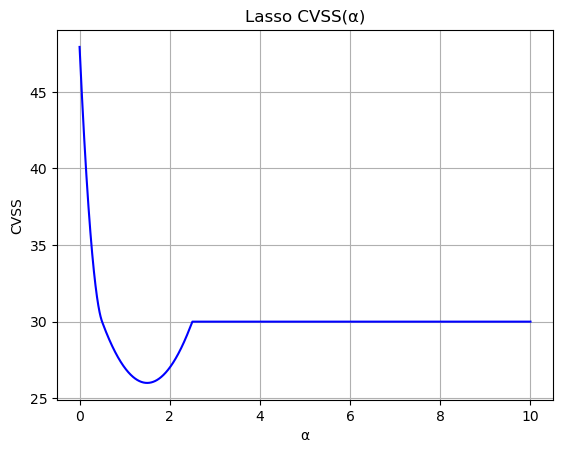

In [8]:
plt.plot(np.linspace(0, 10, N), CVSS, color='b')

plt.xlabel('α')
plt.ylabel('CVSS')
plt.title('Lasso CVSS(α)')
plt.grid(True)
plt.show()